<a href="https://colab.research.google.com/github/Amaliaaap/Project/blob/main/UTS%20Machine-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WINE QUALITY CLASSIFICATION**

By : Dian Amalia Putri / 4112322018

# **1. PERSIAPAN DATA**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

In [28]:
df_train = pd.read_csv('/content/drive/MyDrive/UTS ML/data_training.csv')

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


# **2. PEMBERSIHAN DATA**

In [31]:
df_train = df_train.drop(columns=['Id'])

Fitur Id tidak digunakan karena tidak mengandung informasi yang relevan untuk prediksi

In [32]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000


In [33]:
df_train.shape

(857, 12)

Dataset memuat 857 baris dengan 13 kolom

In [34]:
sorted_df_train = df_train.sort_values('quality', ascending=False)
sorted_df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
631,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
372,8.6,0.420,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.70,8
396,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
835,9.1,0.400,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.50,8
90,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.30,8
...,...,...,...,...,...,...,...,...,...,...,...,...
581,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
169,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
315,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
161,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3


Output di atas menunjukkan hasil pengurutan data berdasarkan label tertinggi (8) hingga terendah.  

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 80.5 KB


Berdasarkan output di atas, dapat terlihat jika tidak terdapat *Missing Value* yang ditandai *non-null* yang berarti semua cell terisi dan tidak perlu penanganan tambahan.

In [36]:
df_train['quality'].value_counts()

,count
quality,
5,362
6,341
7,109
4,26
8,13
3,6


Meskipun variabel *quality* memiliki rentang teoritis dari 0 hingga 10, pada dataset ini hanya terdapat nilai dari 3 hingga 8.

**DATA VISUALIZATION**

**Data Distibution**

Text(0, 0.5, 'Fixed Acidity')

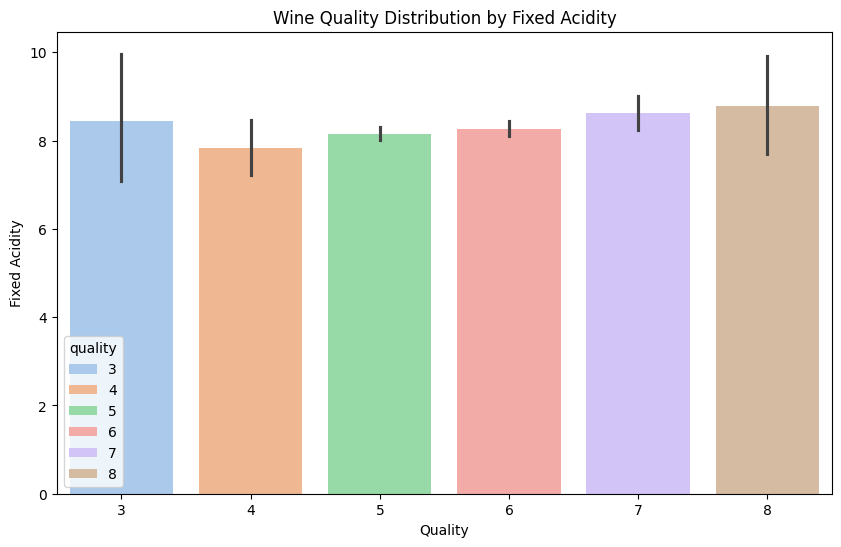

In [37]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='fixed acidity', data = df_train, hue='quality', palette = 'pastel')
plt.title('Wine Quality Distribution by Fixed Acidity')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')

Dari plot di atas, terlihat bahwa *fixed acidity* tidak spesifikasi khusus untuk mengklasifikasikan *quality*.

Text(0, 0.5, 'volatile acidity')

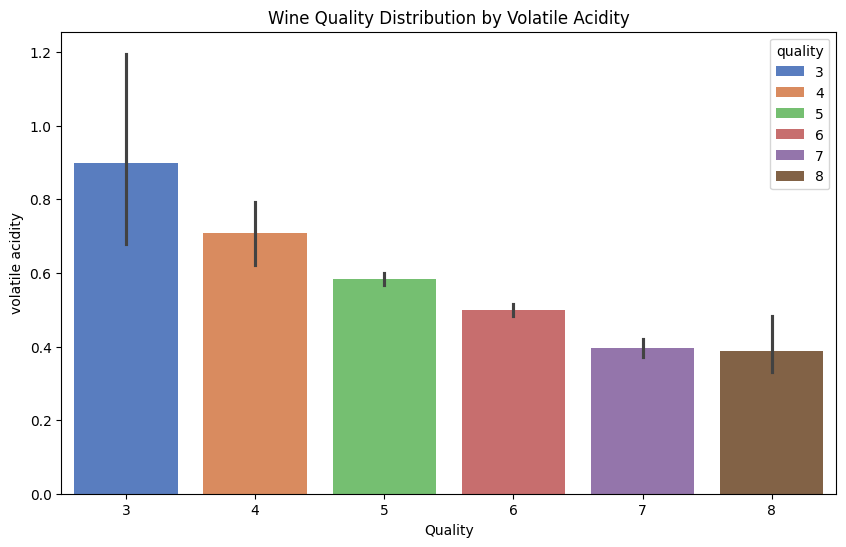

In [38]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='volatile acidity', data = df_train, hue='quality', palette = 'muted')
plt.title('Wine Quality Distribution by Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('volatile acidity')

Dari plot di atas, terlihat bahwa semakin rendah *volatile acidity* maka diasosiasikan dengan anggur berkualitas lebih tinggi. Sehingga fitur ini sangat informatif untuk membedakan kualitas anggur.

Text(0, 0.5, 'residual sugar')

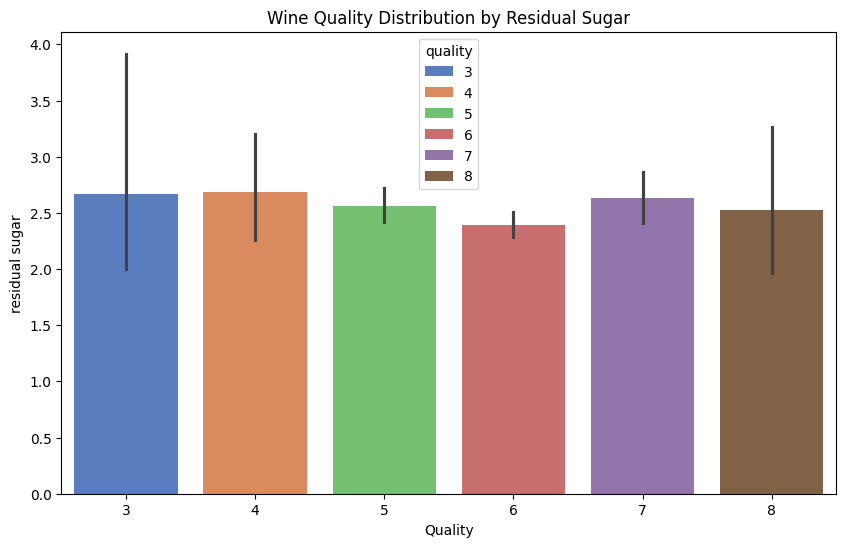

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='residual sugar', data = df_train, hue='quality', palette = 'muted')
plt.title('Wine Quality Distribution by Residual Sugar')
plt.xlabel('Quality')
plt.ylabel('residual sugar')

Berdasarkan plot di atas, *residual sugar* bukan indikator kuat untuk kualitas wine karena nilainya relatif stabil di semua tingkat kualitas.

Text(0, 0.5, 'citric acid')

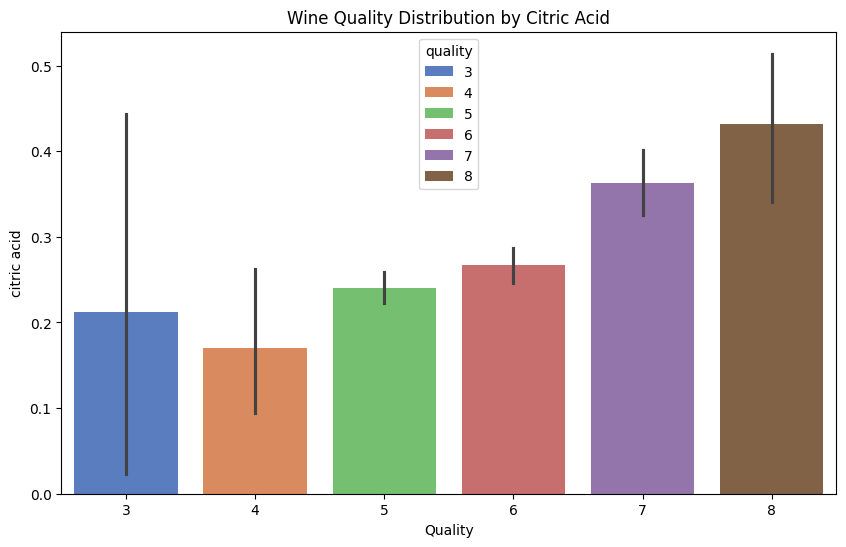

In [40]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='citric acid', data = df_train,hue='quality',  palette = 'muted')
plt.title('Wine Quality Distribution by Citric Acid')
plt.xlabel('Quality')
plt.ylabel('citric acid')

Berdasarkan plot di atas, semakin tinggi kualitas wine, semakin tinggi pula rata-rata kadar citric acid.

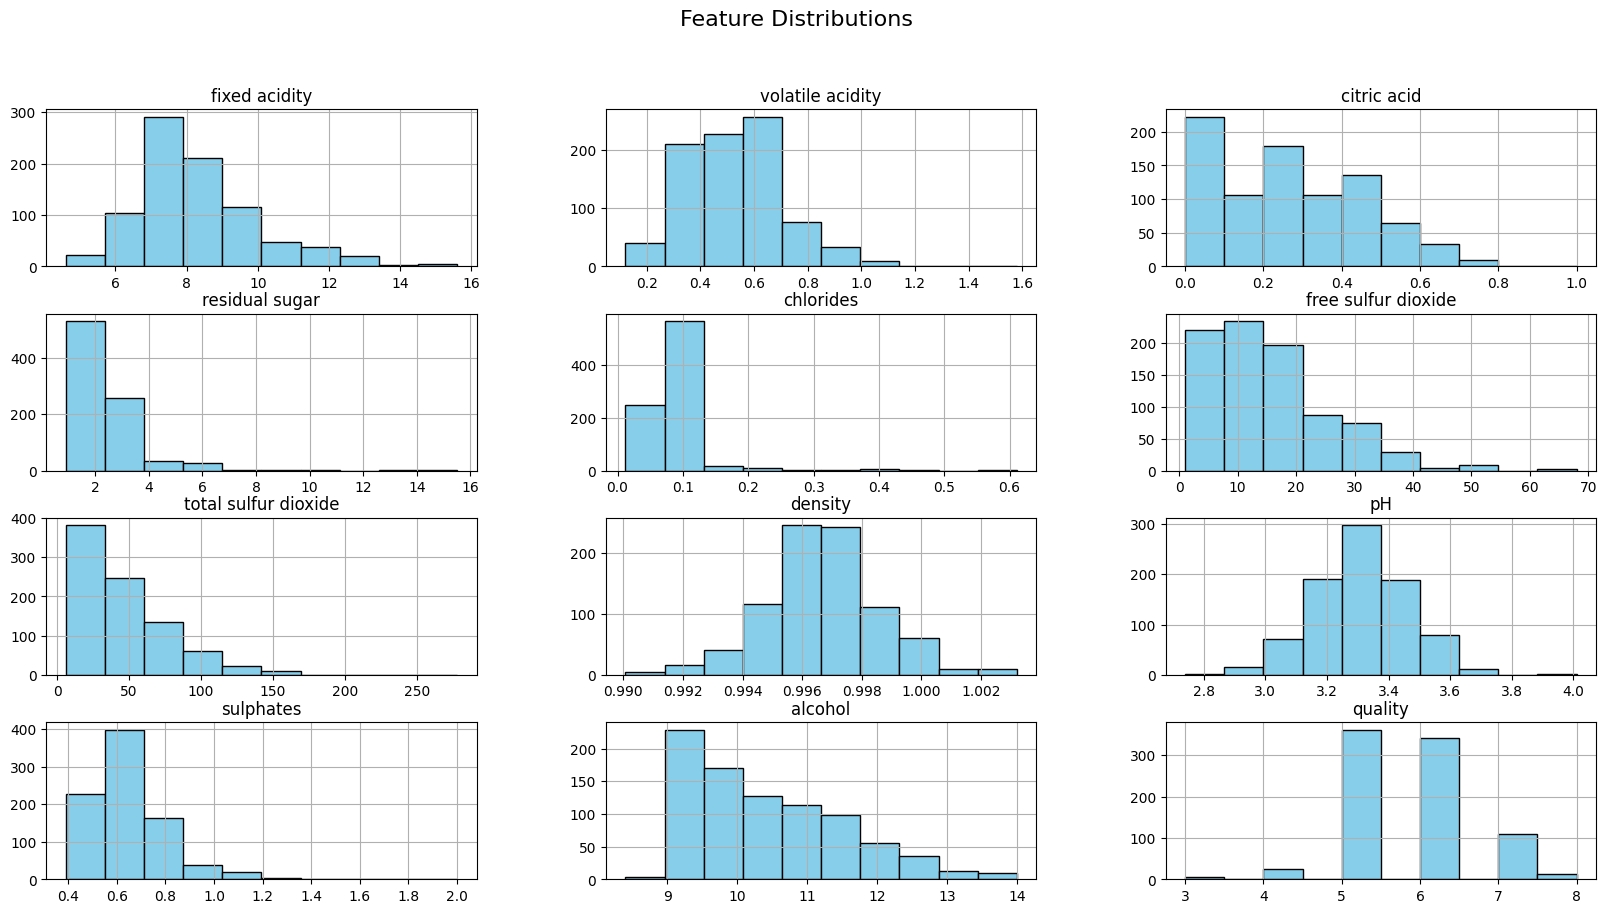

In [41]:
df_train.hist(figsize=(20, 10), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Plot di atas adalah histogram distribusi fitur dalam dataset. Setiap subplot menunjukkan bagaimana nilai-nilai dari satu fitur tersebar di seluruh data.

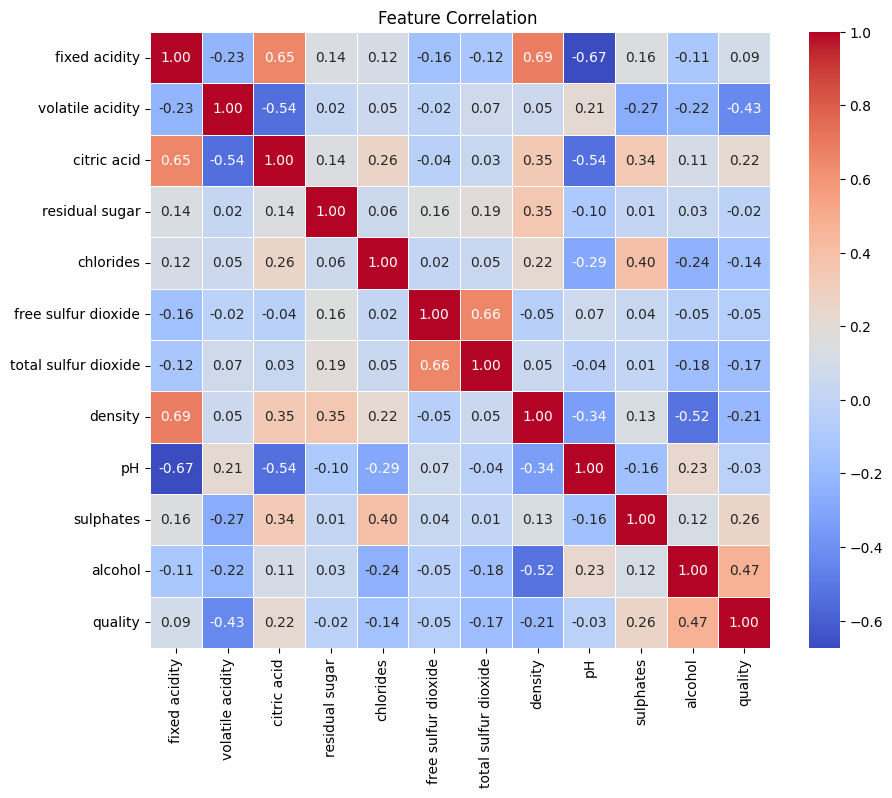

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation ")
plt.show()

Heatmap di atas menunjukkan korelasi antar fitur dalam dataset, di mana nilai korelasi berkisar dari -1 hingga 1 dengan
*   1 adalah korelasi positif sempurna
*   -1 adalah korelasi negatif sempurna
*   0 adalah tidak ada hubungan linear

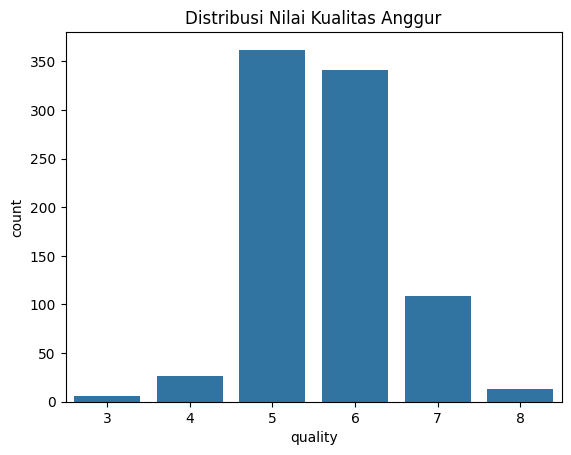

In [43]:
sns.countplot(x='quality', data=df_train)
plt.title("Distribusi Nilai Kualitas Anggur")
plt.show()

Plot di atas menunjukkan distribusi nilai kualitas anggur yang terdapat pada dataset training. Nilai kualitas ini berada pada skala dari 0 hingga 10, namun dalam dataset ini hanya ditemukan nilai dari 3 hingga 8, dengan kualitas 5 dan 6 mendominasi dataset di mana masing-masing berjumlah lebih dari 300 sampel. Dataset ini tidak seimbang (imbalanced dataset) karena sebagaian besar data terkonsentrasi pada kualitas 5 dan 6. Sehingga kita perlu melakukan penyeimbangan data agar model tidak bias terhadap kelas mayoritas.


**SMOTE**

In [44]:
X = df_train.drop(columns=['quality'])
y = df_train['quality']

print("Distribusi sebelum SMOTE:", Counter(y))

Distribusi sebelum SMOTE: Counter({5: 362, 6: 341, 7: 109, 4: 26, 8: 13, 3: 6})


Kelas 5 dan 6 mendominasi dengan masing-masing lebih dari 300 data yang menyebabkan data tidak seimbang dan model cenderung akan bias terhadap kelas mayoritas, sehingga performa pada kelas minoritas menjadi rendah.  

Maka untuk mengatasi ketidakseimbangan ini, dilakukan teknik SMOTE yang bekerja dengan membuat sampel sintetis guna menyeimbangkan jumlah sampel antar kelas mayoritas tanpa menghapus data mayoritas.

In [45]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:", Counter(y_resampled))

Distribusi setelah SMOTE: Counter({5: 362, 7: 362, 6: 362, 4: 362, 8: 362, 3: 362})


Setelah dilakukan SMOTE, dataset menjadi seimbang karena kini semua kelas memiliki jumlah data yang sama, yaitu 362 sampel. Sehingga model akan mendapatkan informasi yang cukup dari semua kelas dan tidak bias terhadap kelas mayoritas.

# **3. PEMBUATAN MODEL**

**FEATURE SCALING**

Karena banyak fitur memiliki distirbusi yang tidak normal, maka dilakukan standarisasi menggunakan StandardScaler.

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

**SPLIT DATA**

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

**MODELLING**

**a. Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)

**b. Logistic regression**

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
acc_lr = accuracy_score(y_val, y_pred_lr)

**c. SVM**

In [50]:
from sklearn.svm import SVC
svm_model = SVC().fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
acc_svm = accuracy_score(y_val, y_pred_svm)

**d. Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt =dt.predict(X_val)
acc_dt =  accuracy_score(y_val, y_pred_dt)


**e. K-Nearest Neighbors**

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
acc_knn = accuracy_score(y_val, y_pred_knn)

**f. Gradient Boosting**

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
acc_gb = accuracy_score(y_val, y_pred_gb)

In [54]:
print('='*50)
print('PERBANDINGAN AKURASI MODEL')
print('='*50)

df_perbandingan = pd.DataFrame({
    'Model':['Random Forest','Logistic Regression','SVM','Decision Tree', 'KNN', 'Gradient Boosting'],
    'Akurasi':[acc_rf, acc_lr,acc_svm, acc_dt, acc_knn, acc_gb]
})

print(df_perbandingan)

PERBANDINGAN AKURASI MODEL
                 Model   Akurasi
0        Random Forest  0.857471
1  Logistic Regression  0.645977
2                  SVM  0.774713
3        Decision Tree  0.760920
4                  KNN  0.774713
5    Gradient Boosting  0.829885


Berdasarkan hasil training model di atas, Random Forest (0,85) memiliki nilai akurasi yang tinggi dibandingkan model lain. Dengan akurasi yang tinggi, model ini memberikan performa terbaik dibandingkan model lain dalam dataset ini.

**EVALUASI MODEL**

In [55]:
print("\nClassification Report of Random Forest :\n", classification_report(y_val, y_pred_rf))


Classification Report of Random Forest :
               precision    recall  f1-score   support

           3       0.95      1.00      0.97        76
           4       0.92      1.00      0.96        70
           5       0.75      0.73      0.74        63
           6       0.69      0.57      0.62        74
           7       0.85      0.85      0.85        88
           8       0.93      1.00      0.96        64

    accuracy                           0.86       435
   macro avg       0.85      0.86      0.85       435
weighted avg       0.85      0.86      0.85       435



Penjelasan per kelas untuk hasil di atas
*   Kelas 3: Hampir semua prediksi untuk kualitas 3 benar dan semua data kelas 3 berhasil dikenali oleh model
*   Kelas 4: Model sangat baik dalam mengenali kualitas 4 dengan presisi dan recall sangat tinggi.
*   Kelas 5: Model cukup baik mengenali kualitas 5 tapi ada beberapa kesalahan klasifikasi
*   Kelas 6: hanya 57% dari kualitas 6 yang dikenali dengan benar.
*   Kelas 7: dengan presisi dan recall yang seimbang, model cukup solid untuk mengenali kualitas 7.
*   Kelas 8: Semua sampel kelas 8 dikenali dan prediksinya benar.



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

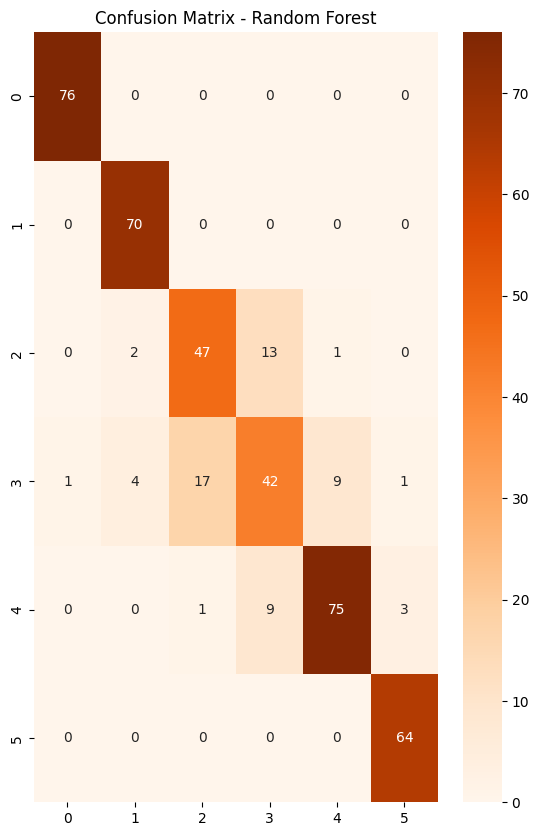

In [82]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 4, 3)
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")


Confusion Matrix di atas menunjukkan berapa banyak data yang diprediksi model dengan benar atau salah untuk masing-masing kelas *quality*.


*   3 (index 0) berhasil mengklasifikasikan 76 data benar sebagai 3.
*   4 (index 1) berhasil mengklasifikasikan 70 data benar sebagai 4.
*   5 (index 2) hanya mengklasifikasikan 46 data benar sebagai 5, 11 data salah masuk di 6, 1 data salah masuk di 7, 3 data salah masuk di 4, dan 2 data salah masuk di 3.
*   6 (index 3) hanya mengklasifikasikan 42 data benar sebagai 6.
*   7 (index 4) mengklasifikasikan 75 data benar sebagai 7.
*   8 (index 5) berhasil mengklasifikasikan 64 data benar sebagai 8.







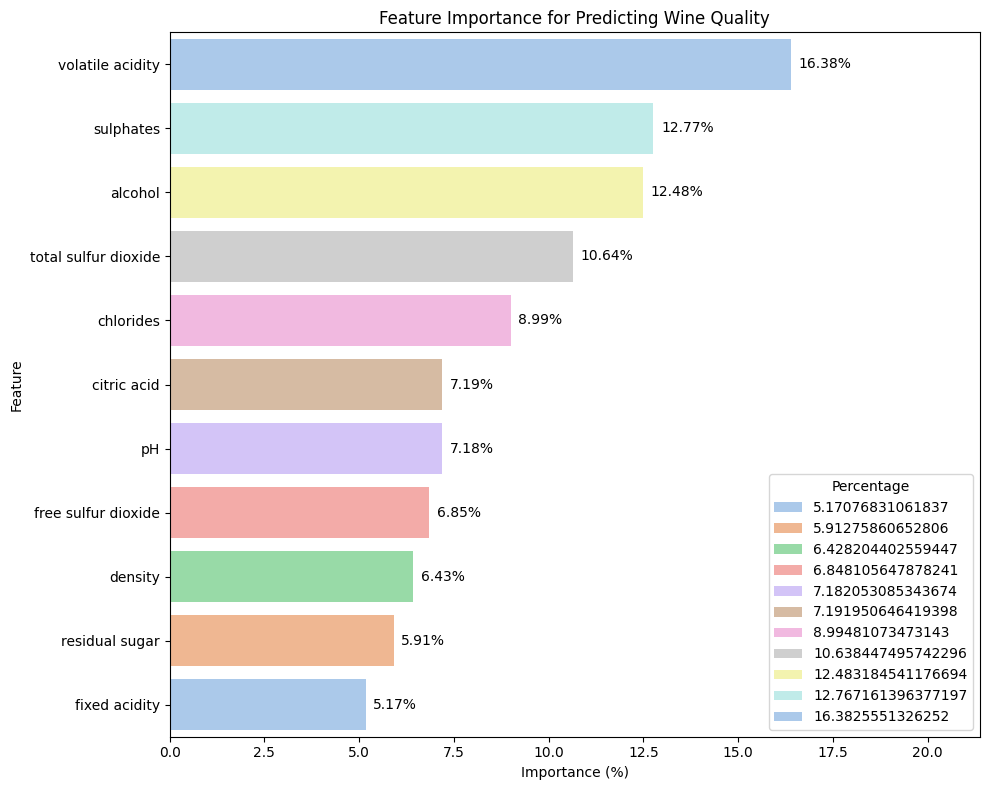

In [86]:
# Feature importance
rf = best_rf
importances = rf.feature_importances_
# Get feature names from the original DataFrame 'X' before scaling
feature_names = X.columns  # X is your original Pandas DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Persentase dan sorting
importance_df["Percentage"] = importance_df["Importance"] * 100
importance_df = importance_df.sort_values(by="Percentage", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=importance_df, x="Percentage", y="Feature", hue='Percentage', palette = 'pastel')

# Tambahkan label tepat di ujung bar
for i, (value, name) in enumerate(zip(importance_df["Percentage"], importance_df["Feature"])):
    ax.text(value + 0.2, i, f'{value:.2f}%', va='center', ha='left', fontsize=10, color='black')

plt.title("Feature Importance for Predicting Wine Quality")
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.xlim(0, importance_df["Percentage"].max() + 5)
plt.tight_layout()
plt.show()

Feature importance menggambarkan seberapa besar kontribusi masing0masing fitur terhadap performa model dalam melakukan prediksi. Dari grafik, terlihat bahwa fitur *volatile acidity* memiliki pengaruh tersebesar, yakni 16,38%, diikuti oleh sulphates dengan kontribusi sebesar 12,77%. Fitur-fitur seperti *fixed acidity*, *residual sugar*, dan *density* memiliki kontribusi terendah.

**TUNNING**

In [65]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [66]:
acc_rf = accuracy_score(y_val, y_pred_rf)
print(f"Akurasi Random Forest (Tuned): {acc_rf:.4f}")
print("Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Best Parameters:\n", grid_search.best_params_)


Akurasi Random Forest (Tuned): 0.8598
Classification Report:
               precision    recall  f1-score   support

           3       0.99      1.00      0.99        76
           4       0.92      1.00      0.96        70
           5       0.72      0.75      0.73        63
           6       0.66      0.57      0.61        74
           7       0.88      0.85      0.87        88
           8       0.94      1.00      0.97        64

    accuracy                           0.86       435
   macro avg       0.85      0.86      0.86       435
weighted avg       0.85      0.86      0.86       435

Best Parameters:
 {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


Hasil evaluasi model Random Forest setelah dilakukan tuning menunjukkan peningkatan kinerja secara umum, ditandai dengan akurasi sebesar 86%, serta nilai *macro average* dan *weighted average* f1-score sebesar 0.86. Hal ini menunjukkan bahwa model telah mampu mengklasifikasikan kualitas anggur dengan lebih baik dan lebih seimbang di berbagai kelas.  

Model menunjukkan performa yang sangat baik pada kelas 3, 4, 7, dan 8. Pada kelas 3 dan 8, model berhasil memprediksi hampir seluruh data dengan benar, terbukti dari nilai recall 1.00 dan f1-score mendekati sempurna (masing-masing 0.99 dan 0.98). Pada kelas 4 dan 7, precision dan recall keduanya berada di atas 0.90, menandakan kestabilan model dalam memprediksi kualitas pada rentang tersebut.

Meskipun performa pada kelas 5 dan 6 masih relatif lebih rendah dibanding kelas lain, model justru memperlihatkan peningkatan f1-score pada kelas 5 menjadi 0.72, menunjukkan bahwa model lebih baik dalam mengenali karakteristik anggur berkualitas sedang. Namun, kelas 6 masih menjadi tantangan, dengan recall hanya 0.55, yang berarti cukup banyak data kelas 6 yang masih salah diklasifikasikan, kemungkinan besar tertukar dengan kelas 5 atau 7 karena kemiripan fitur kimia.

Text(0.5, 1.0, 'Random Forest')

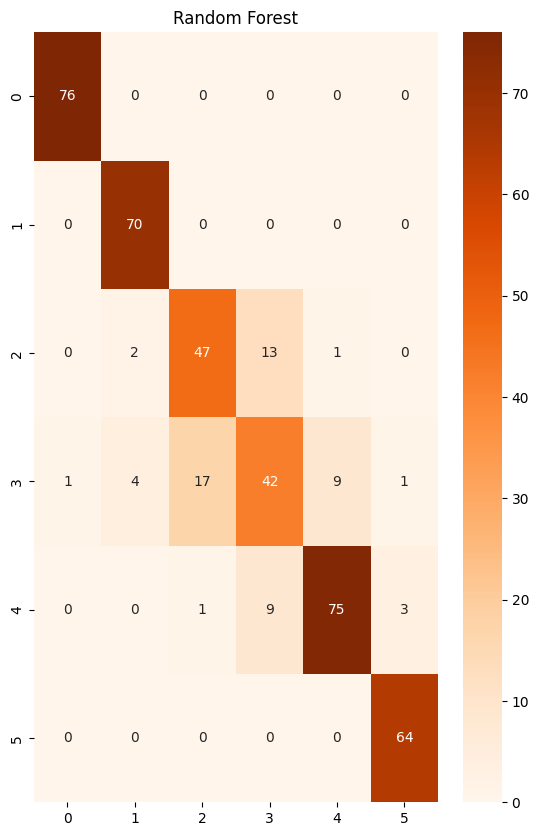

In [67]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 4, 3)
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest")

Setelah dilakukannya tunning hyperparameter pada model Random Forest menggunakan GridSearchCV, performa model secara keseluruhan menunjukkan peningkatan yang cukup baik.

**PEMILIHAN MODEL TERBAIK DARI GRIDSEARCH**

In [68]:
best_rf = grid_search.best_estimator_

**MENYIMPAN MODEL**

In [69]:
import joblib

In [70]:
joblib.dump(best_rf, 'model.pkl')

['model.pkl']

In [71]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# **4. PREDIKSI DATA UJI**

In [72]:
import joblib
import pandas as pd

**MEMUAT MODEL DAN SCALER YANG TELAH DISIMPAN**

In [73]:
model = joblib.load('/content/model.pkl')
scaler = joblib.load('/content/scaler.pkl')

In [74]:
df_test = pd.read_csv('/content/drive/MyDrive/UTS ML/data_testing.csv')
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222
1,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514
2,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417
3,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754
4,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516
...,...,...,...,...,...,...,...,...,...,...,...,...
281,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.800000,1147
282,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.900000,296
283,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.100000,170
284,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,1439


In [75]:
df_test = df_test.drop(columns=['Id'])

**TRANSFORMASI DAN PREDIKSI DATA TESTING**

In [76]:
X_test_scaled = scaler.transform(df_test)

In [77]:
y_pred = model.predict(X_test_scaled)

**MEMBUAT DATAFRAME HASIL PREDIKSI**

In [79]:
df_prediksi = pd.DataFrame({
    'Id': range(1, len(y_pred) + 1),
    'quality': y_pred
})

**MENYIMPAN HASIL PREDIKSI**

In [80]:
df_prediksi.to_csv('hasilprediksi_018.csv', index=False)

In [81]:
df_hasilprediksi = pd.read_csv('/content/hasilprediksi_018.csv')
df_hasilprediksi

,Id,quality
0,1,5
1,2,6
2,3,5
3,4,5
4,5,6
...,...,...
281,282,6
282,283,5
283,284,4
284,285,6
